In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')

In [3]:
train = pd.read_csv(r"D:\Data Science\Projects\Analytics vidya\Black Friday Sales Prediction\train.csv")
test = pd.read_csv(r"D:\Data Science\Projects\Analytics vidya\Black Friday Sales Prediction\test.csv")
sample_sub = pd.read_csv(r"D:\Data Science\Projects\Analytics vidya\Black Friday Sales Prediction\sample_submission_V9Inaty.csv")

In [4]:
train.shape, test.shape, sample_sub.shape

((550068, 12), (233599, 11), (233599, 3))

## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


## Data Discription

User_ID : 	User ID (Informative)

Product_ID : 	Product ID (Informative, Categorical)

Gender : 	Sex of User (Categorical)

Age : 	Age in bins (Categorical- Range)

Occupation : 	Occupation (Masked) (Categorical - Nominal)

City_Category : 	Category of the City (A,B,C) (Categorical - Nominal)

Stay_In_Current_City_Years :	Number of years stay in current city (Categorical - Ordinal)

Marital_Status : 	Marital Status (Categorical - Binary)

Product_Category_1 :	Product Category (Masked) (Categorical)

Product_Category_2 : 	Product may belongs to other category also (Masked) (Categorical)

Product_Category_3 : 	Product may belongs to other category also (Masked) (Categorical)

Purchase : 	Purchase Amount (Target Variable)

---


* We can see that variables 0 to 10 can be used for modelling.
* **User_ID** is identifier column.
* Variable **Purchase** is target column. It is a continuous column.

## Hypothesis Generation

1. Are younger people purchasing more than old people?
2. Does married peoples purchasing more than non-married peoples?
3. Does Occupation have effect on Purchasing.
4. Does New people in cities have higher purchasing?
5. Does Females have higher purchasing than Males?
6. Which product is getting purchased only by Females & which product is getting purchased only by Males?

# EDA

Lets go and explore our training and test datasets. We will do the following steps:

1. Are younger people spending more on purchasing than old people?
2. Does married peoples spending more on purchasing more than non-married peoples?
3. Does Occupation have effect on Purchasing.
4. Does New people in cities spending higher on purchasing?
5. Does Females spend on purchasing than Males?
6. Which product is getting purchased only by Females & which product is getting purchased only by Males?


### 1. Brief Look at the Dataset

In [5]:
train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [6]:
test.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


### 2. See the shape of Dataset. Variables and Target column

In [8]:
print(f'The shape of Train Dataset is {train.shape}')
print(f'The shape of Test Dataset is {test.shape}')

target = 'Purchase' # Target Variable

features = [col for col in train.columns if col not in [target]] # Features

print(f'\nThe Dataset have total {len(features)} features')

The shape of Train Dataset is (550068, 12)
The shape of Test Dataset is (233599, 11)

The Dataset have total 11 features


### 3. Target Distribution

In [9]:
pd.DataFrame(train[target].describe())

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


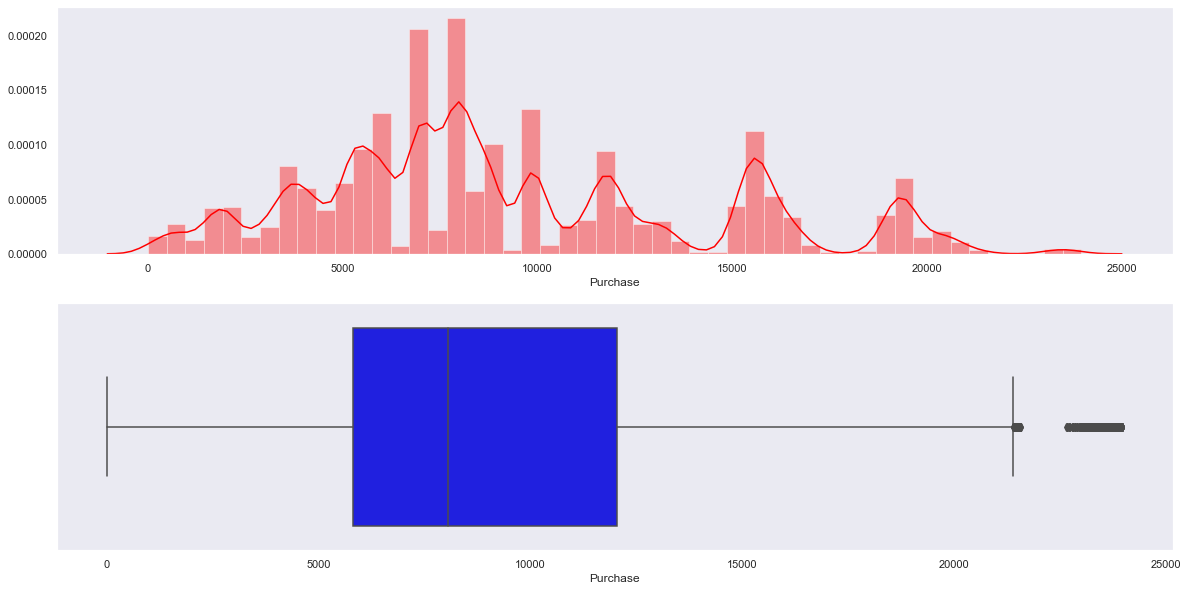

In [10]:
f,ax = plt.subplots(2,1,figsize=(20,10))
axx = ax.flatten()

sns.distplot(train[target],ax = axx[0], color='Red')
sns.boxplot(train[target],ax = axx[1], color='Blue')

* We have most of the purchases in between 5000 to 12000.

### 4. See the variables datatypes.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**We will convert object datatypes into numbers later in Preprocessing.**

---

### 5. See The Number/Percentage Of Missing values

In [12]:
train.isna().sum() / train.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [13]:
test.isna().sum()/test.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

**Both Train and Test Set have missing values in Product_Category_2 and Product_Category_3. We Will deal with it later.**

### 6. Unique Values in each Variable

In [14]:
pd.concat((train.nunique(), test.nunique()), axis = 1)

,0,1
User_ID,5891,5891.0
Product_ID,3631,3491.0
Gender,2,2.0
Age,7,7.0
Occupation,21,21.0
City_Category,3,3.0
Stay_In_Current_City_Years,5,5.0
Marital_Status,2,2.0
Product_Category_1,20,18.0
Product_Category_2,17,17.0


* There are total 5891 unique user in both train and test set.
* We can see that some of Product_ID's are missing in test set.
* Also 2 unique Product_Category_1 are missing in Test set.

---
# Univariate Analysis

In [15]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

### 1. Pie Plots

In [16]:
pie_ls = ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

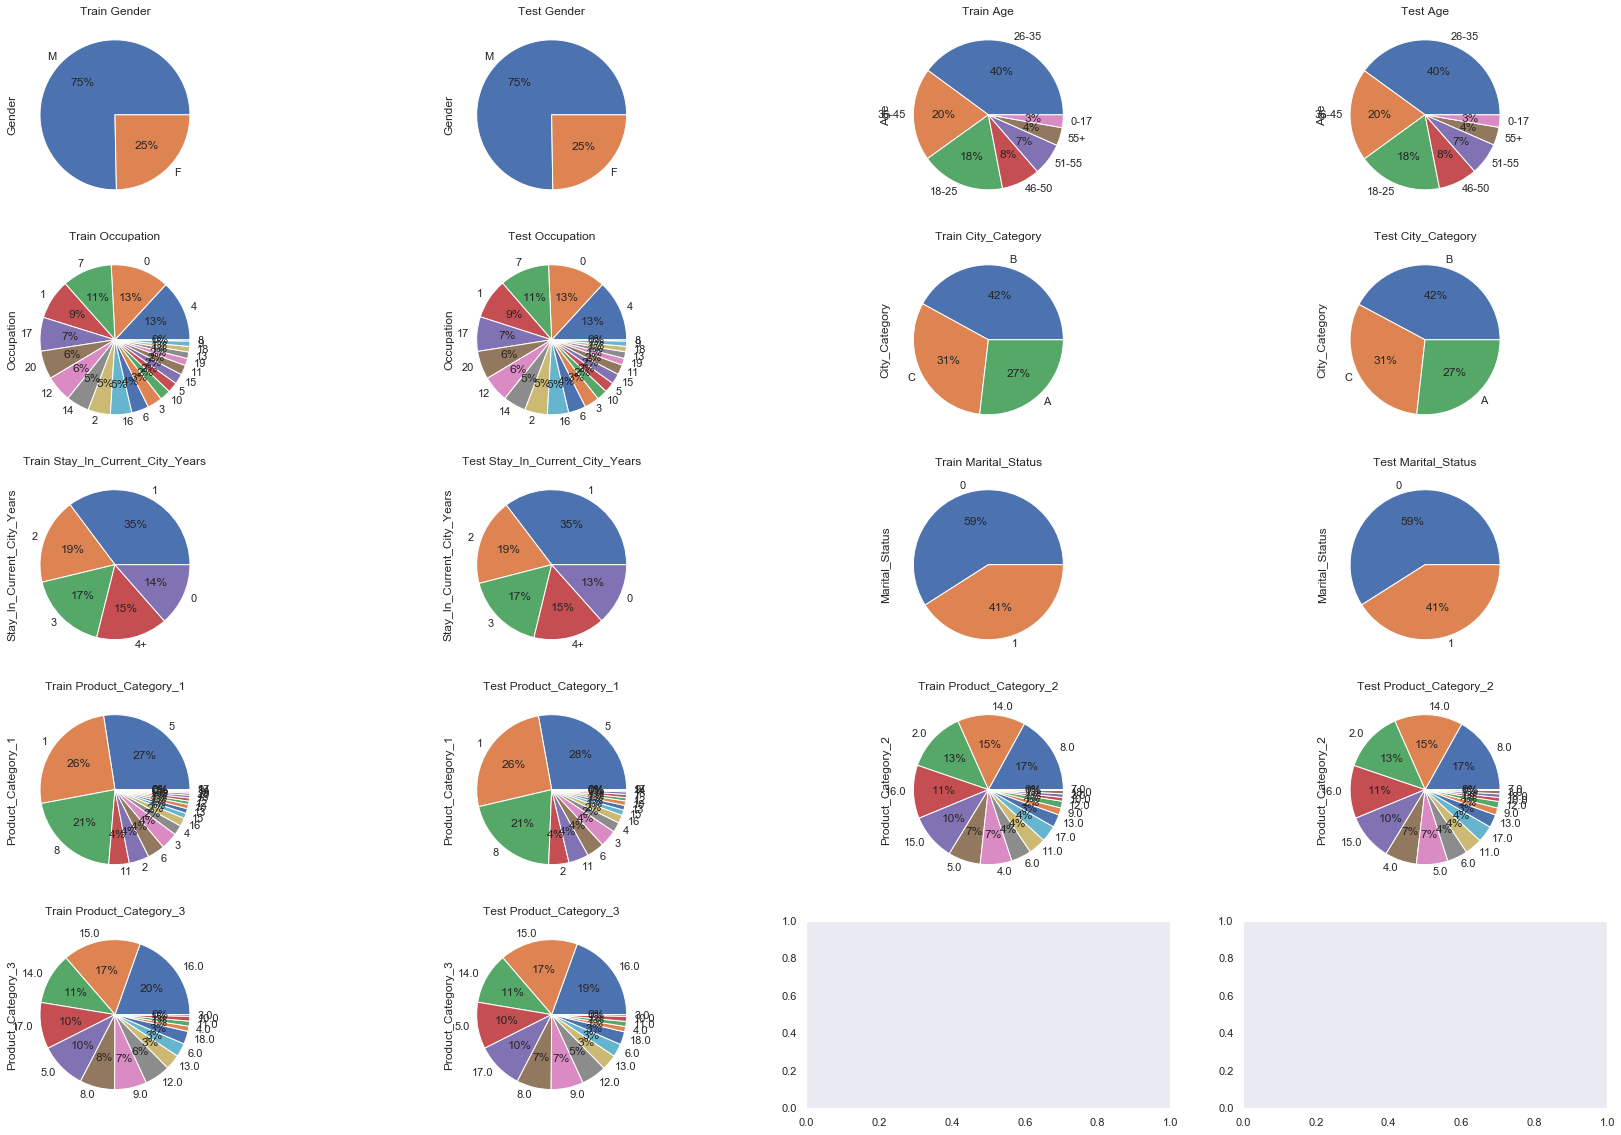

In [17]:
f, ax = plt.subplots(5,4,figsize = (30,20))
axx = ax.flatten()

index = 0
for column in pie_ls:
    # train[column].value_counts().plot(kind='pie', ax = axx[index], title=column, autopct='%.0f', fontsize=12)
    train[column].value_counts().plot.pie(autopct = '%1.0f%%', title='Train '+column, ax = axx[index])
    index+=1
    test[column].value_counts().plot.pie(autopct = '%1.0f%%', title='Test '+column, ax = axx[index])
    index+=1

### Insights : 

** For all the columns, distribution of categories is same in both Train and Test data. 

**Gender** : 1. There are 75% Males and 25% Females.

**'Age'** :
        1. Most of the customers are of age between 26-35. Follwed to that, Age groups 36-45 & 18-25 have 20% and 18% customers respectively.
        2. Most of our customers are working class people.
        3. We have least amount of customers as Teenagers and Old people.

**Occupation**:
        1. Half of the customers have occupation : 4, 0, 7, 1, 17. (Higher to Lower percentage of customers.)

**City_Category** : 
        1. Most of the customers (42%) are from City_Category : B.

**Stay_in_current_city_years** : 
        1. Most of the customers (35%) are staying in their cities for 1 year.

**Marital_Status**:
        1. 59% of our customers are married.

**Product_Category_1** : 
        1. 74% of Product_Category_1 is occupied by just 3 categories. (5 : 27%, 1 : 26%, 8: 21%).
        2. Some of the product in Product_Categories_1 have selling percentage less than 1%.

**Product_Category_2** : 
        1. 65% of the Product_Category_2 is occupied by categories: (8:17% ,14:15%, 2:13%, 16:11%, 15:10%)

**Product_Category_3**:
        1. 65% of the Product_Category_2 is occupied by categories: (16,15,14,17,5)
        
### Feature Ideas: 
        1. 'is_working': Does a particular customer is in working class(Age between 18-45) or not.
        2. 'is_popular' : Does a particular product is among Product_Category_1 : (5, 1, 8).

---
# Bivariate Analysis

### 1. Boxplot with Target variable

In [18]:
box_ls = ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

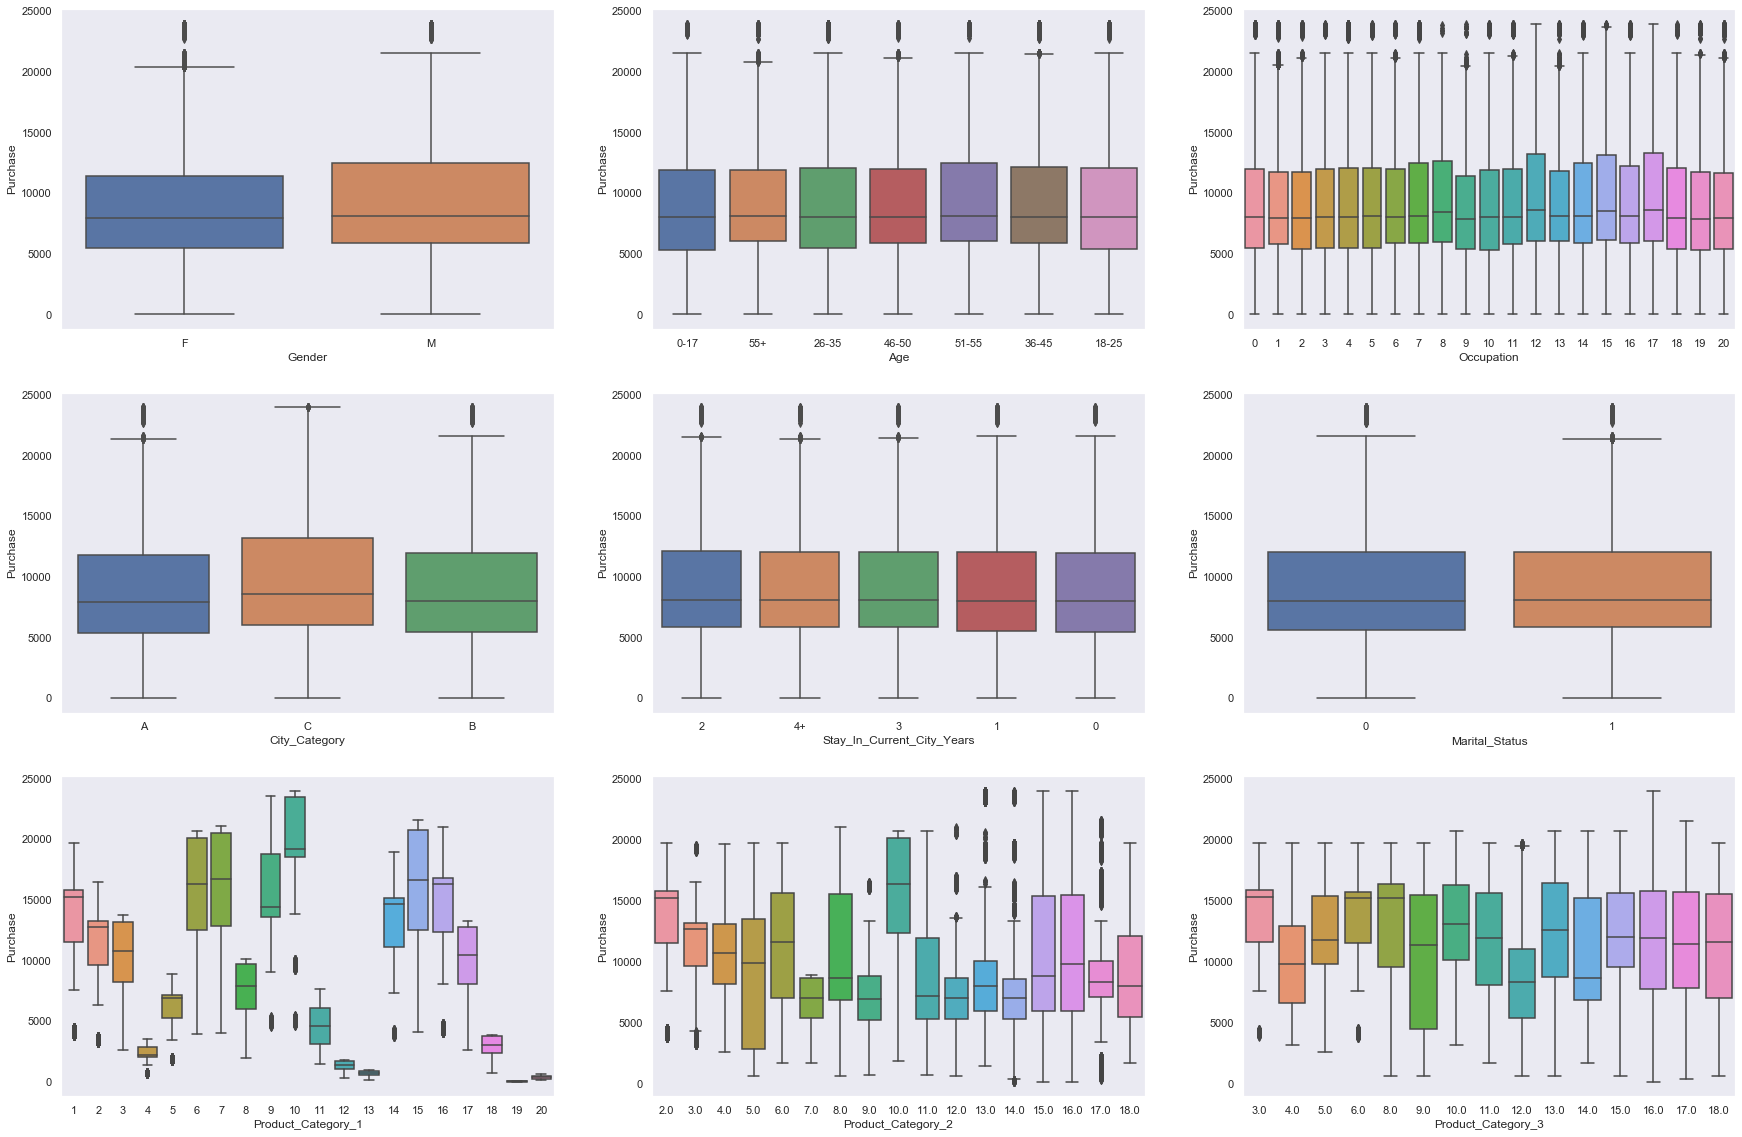

In [19]:
f, ax = plt.subplots(3,3,figsize = (30,20))
axx = ax.flatten()

for index, column in enumerate(box_ls):
    sns.boxplot(data = train, x = column, y = target, ax = axx[index])

### Insights:

1. City_Category **C** have almost no outliers at high purchase price.
2. Categories (1, 6, 7, 9, 10, 15, 16) of Product_Category_1 have high price range.
3. Categories (4, 5, 8, 11, 12, 13, 18, 19, 20) of Product_Category_1 have lower proce range.

---
# Hypothesis testing 

1. Are younger people spending more on purchasing than old people?
2. Does married peoples spending more on purchasing more than non-married peoples?
3. Does Occupation have effect on Purchasing.
4. Does New people in cities spending higher on purchasing?
5. Does Females spend on purchasing than Males?
6. Which product is getting purchased only by Females & which product is getting purchased only by Males?

### 1. Are younger people spending more on purchasing than old people?

**Answer** : 

        Yes. With the help of graph we can see that customers between age 18-45 are spending more on purchasing.
        Old custoomers are spending least on purchasing.

In [20]:
hypo = train.copy()

In [21]:
user_dict = {} 
hypo.apply(lambda x: user_dict.setdefault(x['User_ID'], x['Age']), axis = 1)

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Length: 550068, dtype: object

In [22]:
exp = pd.DataFrame(hypo.groupby('User_ID')['Purchase'].sum())
exp['UserID'] = exp.index
exp['Age'] = exp['UserID'].apply(lambda x: user_dict[x])

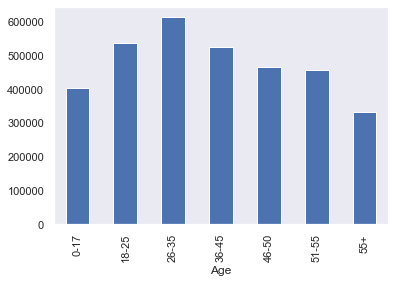

In [23]:
exp.groupby('Age')['Purchase'].median().plot.bar()

---
### 2. Does married peoples spending more on purchasing more than non-married peoples?

**Answer**:

        No. Unmarried customers are spending slightly more on purchasing than Married customers.

In [24]:
user_married_dict = {} 
hypo.apply(lambda x: user_married_dict.setdefault(x['User_ID'], x['Marital_Status']), axis = 1)

0         0
1         0
2         0
3         0
4         0
         ..
550063    1
550064    0
550065    1
550066    0
550067    1
Length: 550068, dtype: int64

In [25]:
exp['Married'] = exp['UserID'].apply(lambda x: user_married_dict[x])

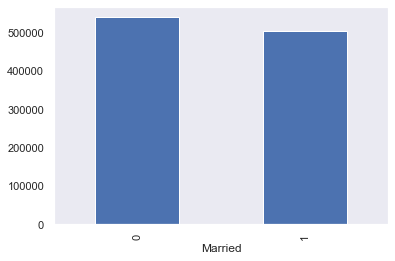

In [26]:
exp.groupby('Married')['Purchase'].median().plot.bar()

---
### 3. Does Occupation have effect on Purchasing.

**ANSWER**:
    
        Yes.   Occupation:  20 have the highest spendings on purchase, and 9 have the least.
        
        

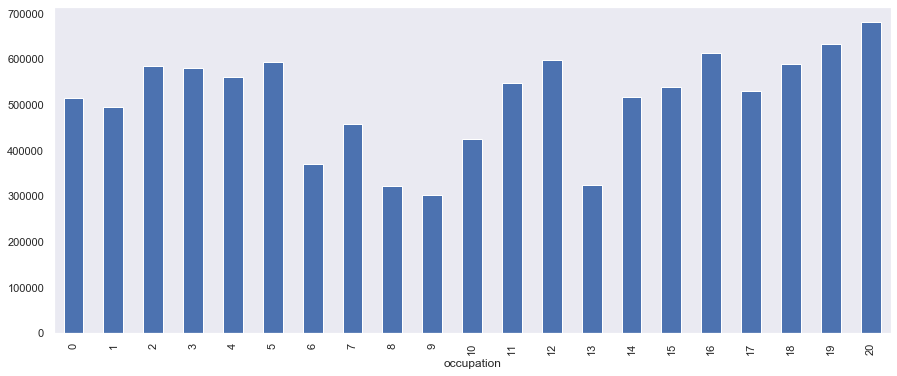

In [27]:
user_occupation_dict = {} 
hypo.apply(lambda x: user_occupation_dict.setdefault(x['User_ID'], x['Occupation']), axis = 1)
exp['occupation'] = exp['UserID'].apply(lambda x: user_occupation_dict[x])
plt.figure(figsize=(15,6))
exp.groupby('occupation')['Purchase'].median().plot.bar()

---
### 4. Does New people in cities spending higher on purchasing?
**ANSWER**:

        No. Stay_In_Current_City_Years Doesn't hace effect on purchasing.

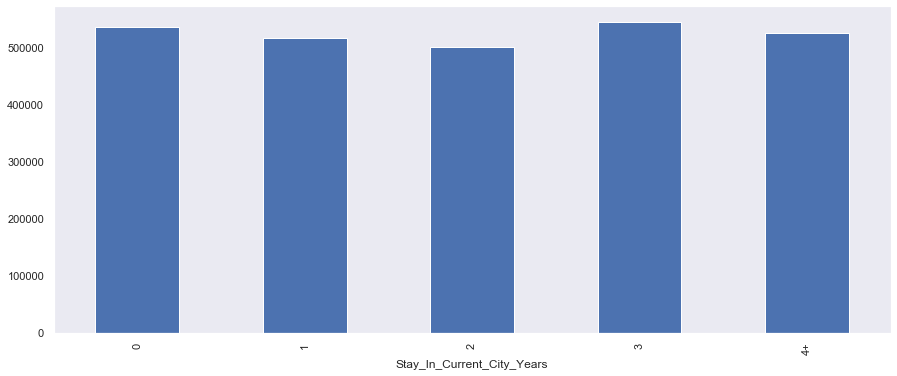

In [28]:
user_staying_dict = {} 
hypo.apply(lambda x: user_staying_dict.setdefault(x['User_ID'], x['Stay_In_Current_City_Years']), axis = 1)
exp['Stay_In_Current_City_Years'] = exp['UserID'].apply(lambda x: user_staying_dict[x])
plt.figure(figsize=(15,6))
exp.groupby('Stay_In_Current_City_Years')['Purchase'].median().plot.bar()

### 5. Does Females spend on purchasing than Males?

**ANSWER**:
        
        No. Males are spending more on purchasing than Females.

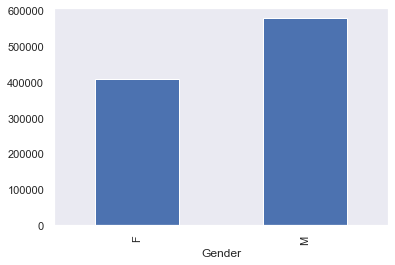

In [29]:
user_Gender_dict = {} 
hypo.apply(lambda x: user_Gender_dict.setdefault(x['User_ID'], x['Gender']), axis = 1)
exp['Gender'] = exp['UserID'].apply(lambda x: user_Gender_dict[x])
exp.groupby('Gender')['Purchase'].median().plot.bar()

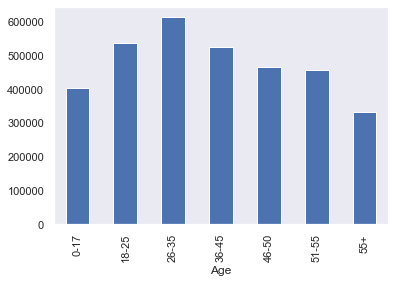

In [30]:
exp.groupby(['Age'])['Purchase'].median().plot.bar()

---
### 6. Which product is getting purchased only by Females & which product is getting purchased only by Males?

        As we can see there are 43 unique products which only Females are buying and 264 unique products which only Males are buying.

In [31]:
female_prod_ls = list(set(hypo[ hypo['Gender'] == 'F']['Product_ID'].to_list()))
male_prod_ls = list(set(hypo[ hypo['Gender'] == 'M']['Product_ID'].to_list()))
len(female_prod_ls), len(male_prod_ls)

(3367, 3588)

In [32]:
female_products = np.setdiff1d(female_prod_ls, male_prod_ls)
male_products = np.setdiff1d( male_prod_ls, female_prod_ls,)

In [33]:
len(female_products),len(male_products)

(43, 264)

---
# Baseline Model

**Here we will try make some rule based predictions and see what score we are getting**

### 1. Putting Median of  `Purchase`  for all samples.

In [34]:
sample_sub['Purchase'] = train['Purchase'].median()
sample_sub.to_csv(r"D:\Data Science\Projects\Analytics vidya\Black Friday Sales Prediction\baseline_preds.csv", index = False)

Leaderboard RMSE score : 5140.40

---
### 2. Putting Mean of  `Purchase`  for all samples.

In [35]:
sample_sub['Purchase'] = train['Purchase'].mean()
sample_sub.to_csv(r"D:\Data Science\Projects\Analytics vidya\Black Friday Sales Prediction\baseline_preds.csv", index = False)

Leaderboard RMSE score : 4982.32

---
### 3. Putting `Occupation` wise Mean  `Purchase` for all samples.

In [36]:
occ_med_pur = train.groupby('Occupation')['Purchase'].mean().to_dict()

In [37]:
test['Purchase'] = test['Occupation'].apply(lambda x: occ_med_pur[x])

In [38]:
sample_sub['Purchase'] = test['Purchase']
sample_sub.to_csv(r"D:\Data Science\Projects\Analytics vidya\Black Friday Sales Prediction\baseline_preds.csv", index = False)

Leaderboard RMSE score : 4972.30

---
### 4. Putting `Product_Category_1` wise Mean `Purchase` for all samples

In [39]:
prod_cat_med_pur = train.groupby('Product_Category_1')['Purchase'].mean().to_dict()

In [40]:
test['Purchase'] = test['Product_Category_1'].apply(lambda x: prod_cat_med_pur[x])
sample_sub['Purchase'] = test['Purchase']
sample_sub.to_csv(r"D:\Data Science\Projects\Analytics vidya\Black Friday Sales Prediction\baseline_preds.csv", index = False)

Leaderboard RMSE score : 3040.62

---
### 5. Putting `Product_ID` , `Product_Category_1` wise Mean `Purchase` for all samples

Some of the samples in test have Product_ID's which are not in train set. So for those instances we will be imputing Product_Category_1 wise Mean Purchase.

In [41]:
prod_id_med_pur = train.groupby('Product_ID')['Purchase'].mean().to_dict()

In [42]:
train_prod = train['Product_ID'].unique()
train_prod = list(train_prod)

In [47]:

def put(row):
    if row['Product_ID'] not in train_prod:
        return prod_cat_med_pur[row['Product_Category_1']]
    else:
        return prod_id_med_pur[row['Product_ID']]

In [48]:
sample_sub['Purchase'] = test['Purchase']
sample_sub.to_csv(r"D:\Data Science\Projects\Analytics vidya\Black Friday Sales Prediction\baseline_preds.csv", index = False)

Leaderboard RMSE score : 2682.62

---
### 6. Putting `User_ID` ,`Product_ID` , `Product_Category_1` wise Mean `Purchase` for all samples

In [63]:
user_product_dict = train.groupby(['User_ID', 'Product_ID'])['Purchase'].mean().to_dict()

In [84]:
def user_prod(row):
    key = tuple((row['User_ID'], row['Product_ID']))
    try:
        if row['Product_ID'] in train_prod:
            return user_product_dict[key]
        else:
            return prod_cat_med_pur[row['Product_Category_1']]
    except:
        return prod_cat_med_pur[row['Product_Category_1']]

In [86]:
test['Purchase'] = test.apply(lambda x: user_prod(x), axis = 1)

In [87]:
sample_sub['Purchase'] = test['Purchase']
sample_sub.to_csv(r"D:\Data Science\Projects\Analytics vidya\Black Friday Sales Prediction\baseline_preds.csv", index = False)

Leaderboard RMSE score : 3040.62

---
**Results :**
        
     We got the best RMSE score :  2682.62 with our baseline model in which we used Product_ID , Product_Category_1 wise
     wise Mean Purchase for all samples.
    